In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_squared_error
import numpy as np

# Load data
data = pd.read_csv("New Dataframe.csv")

# Separate features and target
X = data.drop(columns=["Target"])  # Replace 'Target' with the actual target column name
y = data["Target"]

# Split data into training, validation, and testing sets with ratios 65:20:15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286*0.35 ≈ 0.15

# Initialize and fit Lasso regression model
Lasso_model = Lasso()
Lasso_model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = Lasso_model.predict(X_val)
y_test_pred = Lasso_model.predict(X_test)

# Evaluation metrics for validation set
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
medae_val = median_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Evaluation metrics for test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
medae_test = median_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Additional statistics for validation predictions
val_stats = {
    "Validation Std Dev": np.std(y_val_pred),
    "Validation Avg": np.mean(y_val_pred),
    "Validation Min": np.min(y_val_pred),
    "Validation Max": np.max(y_val_pred),
}

# Additional statistics for test predictions
test_stats = {
    "Test Std Dev": np.std(y_test_pred),
    "Test Avg": np.mean(y_test_pred),
    "Test Min": np.min(y_test_pred),
    "Test Max": np.max(y_test_pred),
}

# Print validation metrics
print("Validation Metrics:")
print(f"R²: {r2_val:.2f}, MAE: {mae_val:.2f}, MedAE: {medae_val:.2f}, RMSE: {rmse_val:.2f}")
print(f"Std Dev: {val_stats['Validation Std Dev']:.2f}, Avg: {val_stats['Validation Avg']:.2f}, Min: {val_stats['Validation Min']:.2f}, Max: {val_stats['Validation Max']:.2f}\n")

# Print test metrics
print("Test Metrics:")
print(f"R²: {r2_test:.2f}, MAE: {mae_test:.2f}, MedAE: {medae_test:.2f}, RMSE: {rmse_test:.2f}")
print(f"Std Dev: {test_stats['Test Std Dev']:.2f}, Avg: {test_stats['Test Avg']:.2f}, Min: {test_stats['Test Min']:.2f}, Max: {test_stats['Test Max']:.2f}")

Validation Metrics:
R²: 0.78, MAE: 49.75, MedAE: 23.29, RMSE: 97.89
Std Dev: 208.63, Avg: 190.21, Min: -11.92, Max: 588.72

Test Metrics:
R²: 0.79, MAE: 52.11, MedAE: 22.91, RMSE: 101.81
Std Dev: 201.74, Avg: 223.05, Min: -23.31, Max: 548.23


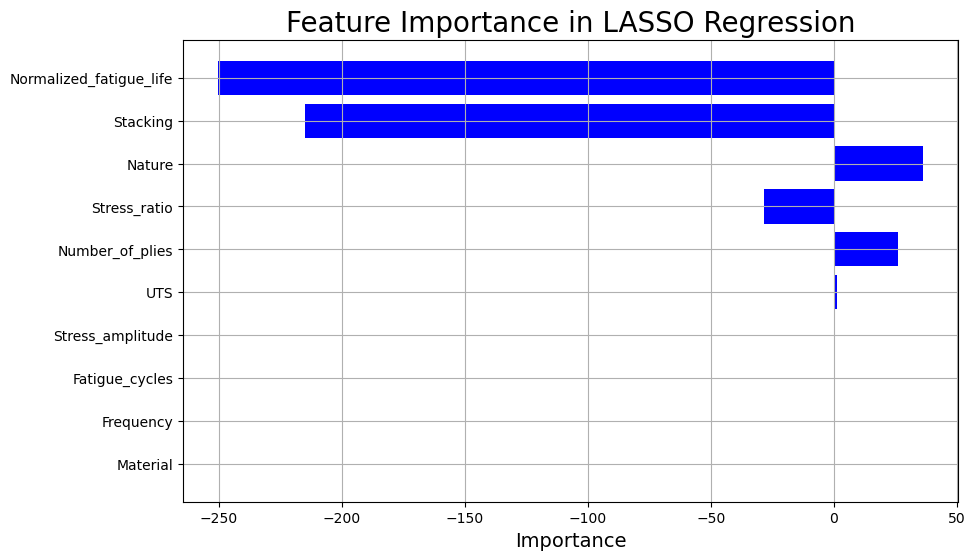

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve feature names and coefficients from the trained model
feature_importance = Lasso_model.coef_
features = X.columns

# Sort features by importance
sorted_idx = np.argsort(np.abs(feature_importance))[::-1]  # Sort by absolute value in descending order
sorted_features = features[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importance in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='blue')
plt.xlabel("Importance", fontsize=14)
plt.title("Feature Importance in LASSO Regression", fontsize=20)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.grid(True)

# Save the plot as an image
plt.savefig('LASSO.tiff', bbox_inches='tight', pad_inches=0.1)  # Add padding to avoid clipping)
plt.show()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
import numpy as np

# Load data from CSV
data = pd.read_csv('New Dataframe.csv')

# Specify features and target variable
X = data.drop(columns='Target')  # Replace 'Target' with the actual target column name
y = data['Target']  # Replace 'Target' with the actual target column name

# Split data: 65% training, 20% validation, 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)

# Define the parameter grid for alpha values to test
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Initialize Lasso with GridSearchCV
lasso_gs = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_absolute_error')
lasso_gs.fit(X_train, y_train)

# Best model after GridSearchCV
best_lasso = lasso_gs.best_estimator_

# Predict and evaluate on validation set
y_val_pred = best_lasso.predict(X_val)
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_medae = median_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Predict and evaluate on test set
y_test_pred_gs = best_lasso.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred_gs)
test_mae = mean_absolute_error(y_test, y_test_pred_gs)
test_medae = median_absolute_error(y_test, y_test_pred_gs)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_gs))

# Additional statistics for validation predictions
val_stats = {
    "Validation Std Dev": np.std(y_val_pred),
    "Validation Avg": np.mean(y_val_pred),
    "Validation Min": np.min(y_val_pred),
    "Validation Max": np.max(y_val_pred),
}

# Additional statistics for test predictions
test_stats = {
    "Test Std Dev": np.std(y_test_pred_gs),
    "Test Avg": np.mean(y_test_pred_gs),
    "Test Min": np.min(y_test_pred_gs),
    "Test Max": np.max(y_test_pred_gs),
}

# Display validation results
print("Validation Set Evaluation:")
print(f"R-squared (R²): {val_r2:.2f}")
print(f"Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Median Absolute Error (MedAE): {val_medae:.2f}")
print(f"Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Std Dev: {val_stats['Validation Std Dev']:.2f}, Avg: {val_stats['Validation Avg']:.2f}")
print(f"Min: {val_stats['Validation Min']:.2f}, Max: {val_stats['Validation Max']:.2f}\n")

# Display test results
print("Test Set Evaluation:")
print(f"R-squared (R²): {test_r2:.2f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Median Absolute Error (MedAE): {test_medae:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Std Dev: {test_stats['Test Std Dev']:.2f}, Avg: {test_stats['Test Avg']:.2f}")
print(f"Min: {test_stats['Test Min']:.2f}, Max: {test_stats['Test Max']:.2f}")

Validation Set Evaluation:
R-squared (R²): 0.79
Mean Absolute Error (MAE): 47.45
Median Absolute Error (MedAE): 22.17
Root Mean Squared Error (RMSE): 96.03
Std Dev: 209.35, Avg: 189.09
Min: -22.17, Max: 586.74

Test Set Evaluation:
R-squared (R²): 0.80
Mean Absolute Error (MAE): 51.25
Median Absolute Error (MedAE): 21.51
Root Mean Squared Error (RMSE): 99.22
Std Dev: 200.01, Avg: 222.86
Min: -22.89, Max: 537.59


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.052e+04, tolerance: 2.357e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.230e+04, tolerance: 1.980e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.772e+04, tolerance: 2.190e

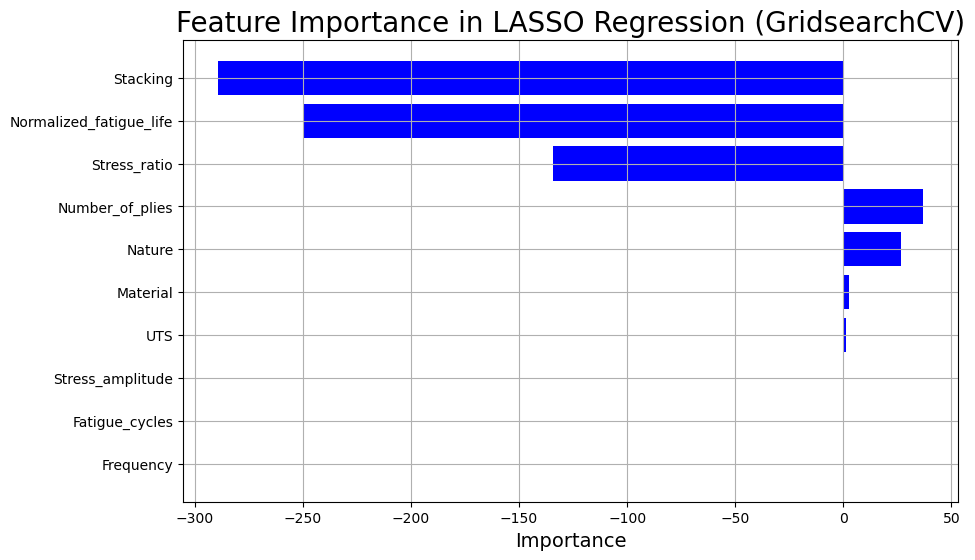

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importance (coefficients) from the best Ridge model
feature_importance = lasso_gs.best_estimator_.coef_
features = X.columns

# Sort features by importance
sorted_idx = np.argsort(np.abs(feature_importance))[::-1]  # Sort by absolute value in descending order
sorted_features = features[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot feature importance in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='blue')
plt.xlabel("Importance", fontsize = 14)
plt.title("Feature Importance in LASSO Regression (GridsearchCV)", fontsize = 20)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.grid(True)

# Save the plot as an image
plt.savefig('LASSO GS.tiff', bbox_inches='tight', pad_inches=0.1)  # Add padding to avoid clipping)
plt.show()

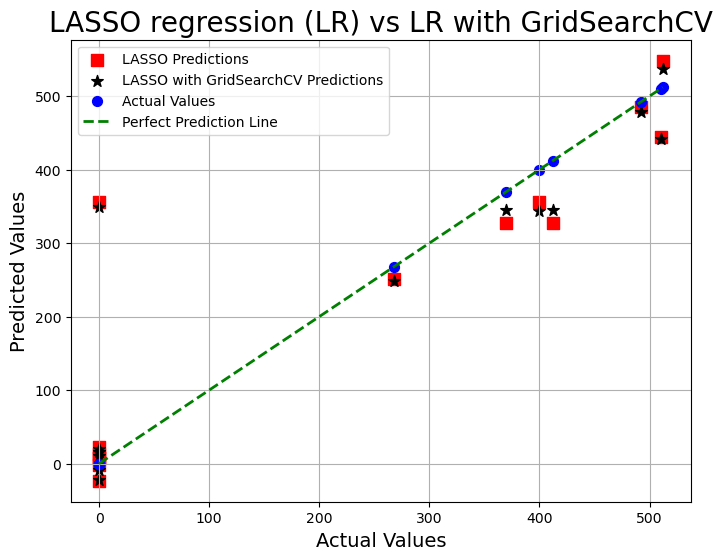

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 6))

# Actual vs RR predictions (Square markers, blue color)
plt.scatter(y_test, y_test_pred, marker='s', color='red', s=75, label="LASSO Predictions")

# Actual vs RR_GridSearchCV predictions (Triangle markers, orange color)
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label="LASSO with GridSearchCV Predictions")

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Reference line (Perfect prediction line y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Adding labels and legend
plt.title("LASSO regression (LR) vs LR with GridSearchCV", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('LASSO vs LASSO with gridserach.tiff')

# Show plot
plt.show()

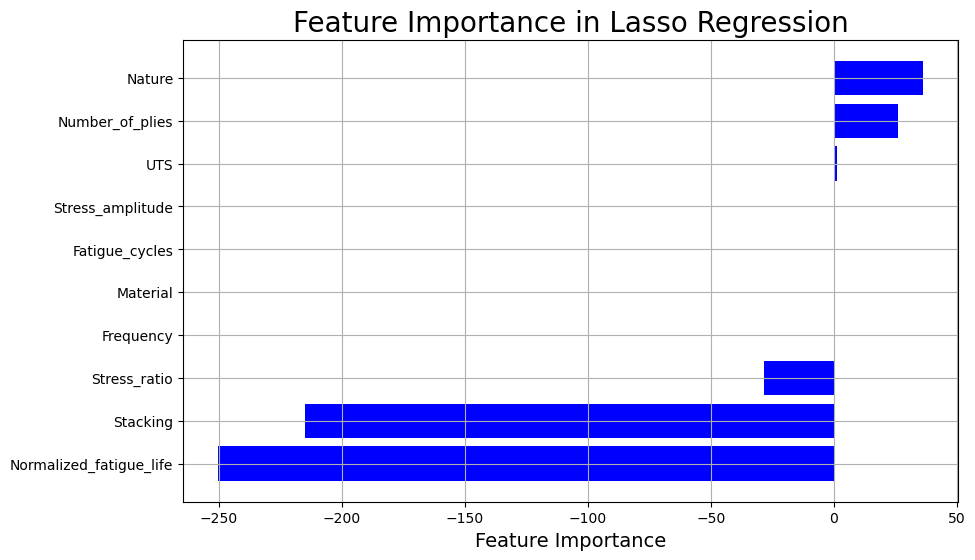

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Load data from CSV
data = pd.read_csv('New Dataframe.csv')

# Specify features and target variable
X = data.drop(columns='Target')  # Replace 'target' with the actual target column name
y = data['Target']  # Replace 'target' with the actual target column name

# Split data: 65% training, 20% validation, 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 * 0.35 ≈ 0.15

# Initialize and fit the Lasso regression model
lasso = Lasso()
lasso.fit(X_train, y_train)

# Extract feature importance (absolute values of the coefficients)
feature_importance = lasso.coef_
feature_names = X.columns

# Create a DataFrame to organize feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Feature Importance in Lasso Regression', fontsize=20)
plt.grid(True)
plt.gca().invert_yaxis()  # To display the most important feature at the top

# Save the plot as an image
plt.savefig('LASSOR_featureimportance.tiff', bbox_inches='tight', pad_inches=0.1)  # Add padding to avoid clipping)
plt.show()